In [2]:
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

from xgboost import XGBClassifier, plot_tree, plot_importance, to_graphviz

from parse_and_create_trees import *
from data_preprocess import *
from cross_validate import *

import warnings
warnings.filterwarnings("ignore")

In [3]:
model = XGBClassifier(learning_rate=0.8,
                      n_estimators=300,
                      booster="gbtree",
                      tree_method="gpu_hist",
                      max_depth=5,
                      random_state=42,
                      verbosity=0)

In [5]:
model.load_model('law_best_model.json')

In [6]:
dump_list = model.get_booster().get_dump()

In [9]:
dump_list[900]

'0:[application<-6] yes=1,no=2,missing=1\n\t1:leaf=0.0236746725\n\t2:[letter_percent_prev_3<0.5] yes=3,no=4,missing=4\n\t\t3:leaf=0.0155750513\n\t\t4:[line_id_prev_2<0.659574449] yes=5,no=6,missing=6\n\t\t\t5:[line_id_prev_3<0.117647059] yes=7,no=8,missing=7\n\t\t\t\t7:leaf=-0.00109367957\n\t\t\t\t8:leaf=-0.0434829667\n\t\t\t6:[letter_percent_prev_1<0.800000012] yes=9,no=10,missing=9\n\t\t\t\t9:leaf=0.0298894476\n\t\t\t\t10:leaf=-0.0145034194\n'

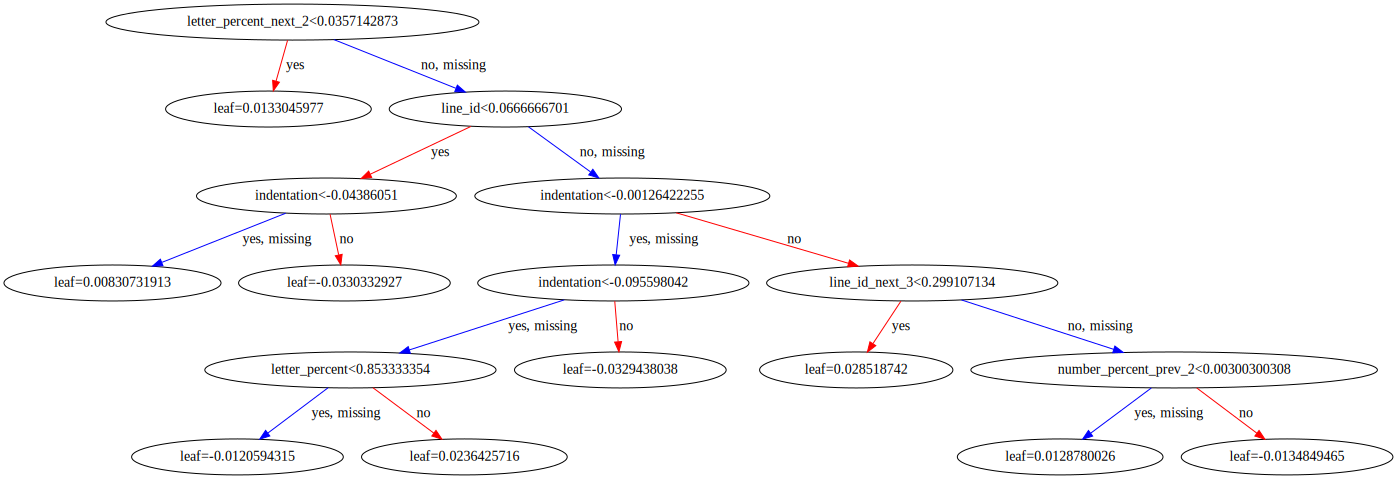

In [161]:
to_graphviz(model, num_trees=1497)

In [14]:
root = '/home/kirb/work/ISP-projects/xgboost_diploma/'

data = pd.read_csv(os.path.join(root, 'law/dataset_prepared/dataset.csv'), index_col=0)
data_prep = data_preprocessing(data, type='law')

law data successfully preprocessed


In [15]:
df = data_prep.drop(['group'], axis=1)

In [16]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1,1)

dataset = np.concatenate((X, Y), axis=1)

feature_to_ind = {}
i = 0
for feature in list(df.columns)[:-1]:
    feature_to_ind[feature] = i
    i += 1 

In [18]:
xgb_parser = XgbModelParser(n_classes=5)

In [19]:
xgb_forest = xgb_parser.get_xgb_model_from_memory(dump_list, 1500, dataset, feature_to_ind)

100%|█████████▉| 1499/1500 [00:00<00:00, 9171.21it/s]


In [74]:
xgb_forest.fit_trees()

100%|██████████| 1500/1500 [04:01<00:00,  6.21it/s]


In [20]:
xgb_forest.print_tree(xgb_forest.xgb_trees[900])

application < -6.0 gain: None
 left:0.0236746725
 right:letter_percent_prev_3 < 0.5 gain: None
  left:0.0155750513
  right:line_id_prev_2 < 0.659574449 gain: None
    left:line_id_prev_3 < 0.117647059 gain: None
        left:-0.00109367957
        right:-0.0434829667
    right:letter_percent_prev_1 < 0.800000012 gain: None
        left:0.0298894476
        right:-0.0145034194


In [44]:
from sklearn.datasets import make_classification
import seaborn as sns

In [2]:
import random

X_train = []
Y_train = []

for i in range(10000):
    x = random.uniform(0,1)
    y = int(random.uniform(0,1) > x)
    X_train.append([x])
    Y_train.append(y)

In [5]:
x_1 = [x[0] for x,y in zip(X_train,Y_train) if y == 1]
x_0 = [x[0] for x,y in zip(X_train,Y_train) if y == 0]

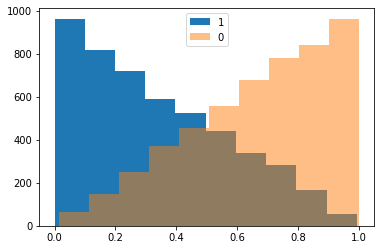

In [6]:
plt.hist(x_1, label='1')
plt.hist(x_0, label='0', alpha=0.5)
plt.legend()

In [47]:
X_test = []
Y_test = []

for i in range(2000):
    x = random.uniform(0,1)
    y = int(random.uniform(0,1) > 0.5)
    X_test.append([x])
    Y_test.append(y)

In [48]:
x_1 = [x[0] for x,y in zip(X_test,Y_test) if y == 1]
x_0 = [x[0] for x,y in zip(X_test,Y_test) if y == 0]

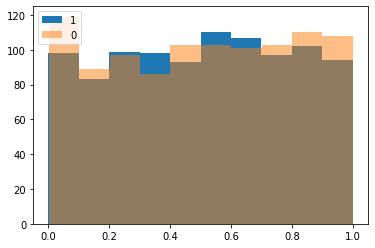

In [49]:
plt.hist(x_1, label='1')
plt.hist(x_0, label='0', alpha=0.5)
plt.legend()

In [10]:
data_train = np.concatenate((np.array(X_train), np.array(Y_train).reshape(-1,1)), axis=1)

In [11]:
df_train = pd.DataFrame(data_train, columns=['f0', 'label'])

In [205]:
X_train = np.array(df_train['feature'])

In [208]:
X_train.reshape(-1,1).shape

(10000, 1)

In [50]:
data_test = np.concatenate((np.array(X_test), np.array(Y_test).reshape(-1,1)), axis=1)

In [51]:
df_test = pd.DataFrame(data_test, columns=['f0', 'label'])

In [210]:
dump_list = model.get_booster().get_dump()

In [211]:
len(dump_list)

10

In [218]:
dump_list[0]

'0:[f0<0.531831861] yes=1,no=2,missing=1\n\t1:[f0<0.232666567] yes=3,no=4,missing=3\n\t\t3:[f0<0.135589033] yes=7,no=8,missing=7\n\t\t\t7:[f0<0.0478621796] yes=15,no=16,missing=15\n\t\t\t\t15:leaf=1.53234673\n\t\t\t\t16:leaf=1.32427192\n\t\t\t8:[f0<0.198739722] yes=17,no=18,missing=17\n\t\t\t\t17:leaf=1.10664785\n\t\t\t\t18:leaf=0.925842702\n\t\t4:[f0<0.371175915] yes=9,no=10,missing=9\n\t\t\t9:[f0<0.282424718] yes=19,no=20,missing=19\n\t\t\t\t19:leaf=0.673189819\n\t\t\t\t20:[f0<0.295877963] yes=29,no=30,missing=29\n\t\t\t\t\t29:leaf=0.393442631\n\t\t\t\t\t30:leaf=0.52332443\n\t\t\t10:[f0<0.497336477] yes=21,no=22,missing=21\n\t\t\t\t21:[f0<0.449379653] yes=31,no=32,missing=31\n\t\t\t\t\t31:leaf=0.250700653\n\t\t\t\t\t32:leaf=0.137500003\n\t\t\t\t22:[f0<0.517301083] yes=33,no=34,missing=33\n\t\t\t\t\t33:leaf=-0.136683419\n\t\t\t\t\t34:leaf=0.140000001\n\t2:[f0<0.816618919] yes=5,no=6,missing=5\n\t\t5:[f0<0.64622879] yes=11,no=12,missing=11\n\t\t\t11:[f0<0.565714717] yes=23,no=24,missin

In [52]:
X_train = df_train.iloc[:, :-1].values
Y_train = df_train.iloc[:, -1].values.reshape(-1,1)

dataset_train = np.concatenate((X_train, Y_train), axis=1)

X_test = df_test.iloc[:, :-1].values
Y_test = df_test.iloc[:, -1].values.reshape(-1,1)

dataset_test = np.concatenate((X_test, Y_test), axis=1)

feature_to_ind = {}
i = 0
for feature in list(df_train.columns)[:-1]:
    feature_to_ind[feature] = i
    i += 1 

In [13]:
feature_to_ind

{'f0': 0}

In [14]:
model = XGBClassifier(learning_rate=0.8,
                      n_estimators=10,
                      booster="gbtree",
                      tree_method="gpu_hist",
                      max_depth=5,
                      random_state=42,
                      verbosity=0)

In [15]:
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.8, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=0)

In [16]:
dump_list_train = model.get_booster().get_dump()

In [23]:
xgb_parser_train = XgbModelParser(1)

In [24]:
xgb_forest_train = xgb_parser.get_xgb_model_from_memory(dump_list_train, 10, dataset_train, feature_to_ind)

 90%|█████████ | 9/10 [00:00<00:00, 1519.31it/s]


In [25]:
xgb_forest_train.fit_trees()

100%|██████████| 10/10 [00:00<00:00, 39.53it/s]


In [53]:
xgb_parser_test = XgbModelParser(1)

In [54]:
xgb_forest_test = xgb_parser.get_xgb_model_from_memory(dump_list_train, 10, dataset_test, feature_to_ind)

 90%|█████████ | 9/10 [00:00<00:00, 6260.16it/s]


In [55]:
xgb_forest_test.fit_trees()

100%|██████████| 10/10 [00:00<00:00, 128.74it/s]


In [45]:
xgb_forest_train.print_tree(xgb_forest_train.xgb_trees[5])

f0 < 0.0134497024 gain: 0.006221405156850934
 left:0.486242771
 right:f0 < 0.953591704 gain: 0.02133830296758199
  left:f0 < 0.137813628 gain: 0.055841945732816645
    left:f0 < 0.134546056 gain: 3.154707571095816e-05
        left:f0 < 0.126455843 gain: 0.0011702422037054017
                left:0.0549206398
                right:-0.158544302
        right:0.455620199
    right:f0 < 0.149789989 gain: 0.004301075535838639
        left:f0 < 0.141565174 gain: 0.0010650604571612043
                left:-0.00973404385
                right:-0.254033118
        right:f0 < 0.230577856 gain: 0.027991902189503315
                left:0.0445024446
                right:-0.0048589292
  right:f0 < 0.985355377 gain: 0.00022293366722038466
    left:-0.117454469
    right:f0 < 0.992903113 gain: 8.011211587908088e-05
        left:-0.444082499
        right:-0.091302067


In [56]:
xgb_forest_test.print_tree(xgb_forest_test.xgb_trees[5])

f0 < 0.0134497024 gain: 5.805380976520169e-05
 left:0.486242771
 right:f0 < 0.953591704 gain: 0.000626254998135567
  left:f0 < 0.137813628 gain: 0.00018189912778898698
    left:f0 < 0.134546056 gain: 0.014387647547448978
        left:f0 < 0.126455843 gain: 0.0015642834673976758
                left:0.0549206398
                right:-0.158544302
        right:0.455620199
    right:f0 < 0.149789989 gain: 0.0004079278000611586
        left:f0 < 0.141565174 gain: 0.0383062920459043
                left:-0.00973404385
                right:-0.254033118
        right:f0 < 0.230577856 gain: 0.00012761818625556254
                left:0.0445024446
                right:-0.0048589292
  right:f0 < 0.985355377 gain: 0.0014634510337812046
    left:-0.117454469
    right:f0 < 0.992903113 gain: 0.0004960317460318553
        left:-0.444082499
        right:-0.091302067
